# Text Mining - Mini Project


## Reading directory for all available story files and then applying TEXT MINING and processing the data.

### Project Begins Here.....

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import math
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [8]:
path = "C:\\Users\\niranjans3ln\\01 BITS Pilani\\Assignments\\Text Mining\\stories"
os.chdir(path)
df = pd.DataFrame() 
lines = []
filename = []
stories = []
i=0
for file in os.listdir():
    # Check whether file is in text format or not
    #if file.endswith(".txt"):
    file_path = f"{path}\{file}"
    fileName, fileExtension = os.path.splitext(file_path)
    fn = fileName.split('C:\\Users\\niranjans3ln\\01 BITS Pilani\\Assignments\\Text Mining\\stories')
    filename.insert(i,fn[1])
    with open(file_path, 'r') as f:
        lines = f.readlines()
        lines = [line.rstrip() for line in lines]
    stories.insert(i,lines)
    i=i+1
print(len(filename))
print(len(stories))
df=pd.DataFrame({'fileName':filename,'Text': stories})
print(df)

12
12
     fileName                                               Text
0     \13chil  [                                FOR CHILDREN:...
1    \3gables  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
2     \3lpigs  [                  THE THREE LITTLE PIGS, ,   ...
3   \3sonnets  [, Date:  03-09-89  20:46, From:  Staeorra Rok...
4   \3student  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
5    \3wishes  [                     THE THREE WISHES, ,    O...
6     \4moons  [                       Four Moons of Death, ,...
7    \5orange  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
8   \6ablemen  [                               SIX ABLE MEN, ...
9   \6napolen  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
10  \7oldsamr  [                         THE SEVEN OLD SAMURA...
11  \7voysinb  [                  THE SEVEN VOYAGES OF SINBAD...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fileName  12 non-null     object
 1   Text      12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


## 1) Remove the punctuations. the special characters and convert the text to lower case. (2 Mark)

In [10]:
df['Text'] = df['Text'].astype('str') 
df['Text'] = df['Text'].apply(lambda x:x.lower())
df['Text'] = df['Text'].apply(lambda s:re.sub("[\[\]\\\()\{}\''\":=,-.^*+?$@&!\d{1}]","",s))
df['Text'] = df['Text'].apply(lambda s:re.sub(" +", " ",s))
df['Text'] = df['Text'].apply(lambda s:s.strip())
df['Text'] = df['Text'].apply(lambda s:s.rstrip())


## 2) Remove Stopwords (1 Mark)

In [11]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

sw_list = stopwords.words('english')

df['Text'] = df['Text'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
df['Text'] = df['Text'].apply(lambda s:s.strip())
len(df['Text'])

12

## 3) Create Bigrams for the entire dataset and list down 10 most frequent bigrams. (2 Marks)

In [12]:
listOfFiles = df['Text'].tolist()
listOfWords = []
for file in listOfFiles:
    listOfWords.extend(file.split())
#print(listOfWords)
listOfFiles

['children sly fox mr rabbit sat front porch rocking eating great big carrot looking looks like sly fox coming road said walking end porch shading eyes paws exclaimed sly fox good morning mr rabbit cried sly fox walked across yard good morning replied mr rabbit slight frown face well said sly fox havent seen long time thought would stop chat mr rabbit could rude home even enemy offered sly fox seat porch take chair said politely tbut sly fox stay long leaving asked mr rabbit mother good dinner tonight wont mrs rabbit three little rabs come dinner oh thought mr rabbit knows little rabs wants take us eat us pretended disappointed replied sorry sly fox engagement today want us come tomorrow sly fox chuckled inwardly readily agreed come next day wishing mr rabbit good day trotted road toward home soon sight mr rabbit ran house called mrs rabbit get things together said put rubber boots little rabs move quickly piney woods across brook old sly fox found home destroy us time rabbit family mo

In [13]:
len(listOfWords)

20977

In [14]:
bigrams_series = (pd.Series(nltk.ngrams(listOfWords, 2)).value_counts())[:10]
bigrams_series

(mr, holmes)          43
(said, holmes)        42
(sly, fox)            26
(sherlock, holmes)    23
(one, day)            18
(sinbad, sailor)      17
(mr, soames)          16
(let, us)             16
(masser, holmes)      16
(yes, sir)            14
dtype: int64

Text(0.5, 0, '# of Occurances')

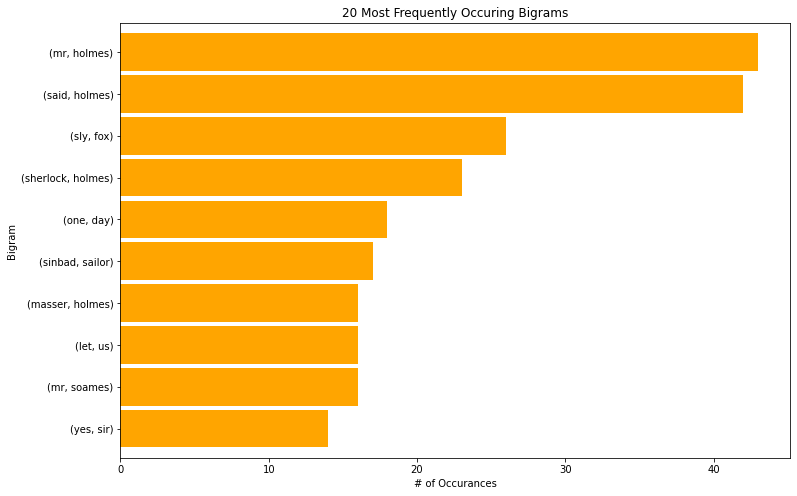

In [17]:
bigrams_series.sort_values().plot.barh(color='orange', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

## 4) You have to implement TF-IDF the Algorithm from scratch. (4 Mark)

In [18]:
DF = {}
for i in range(len(listOfFiles)):
    tokens = listOfFiles[i].split()
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
DF

{'children': {0, 3, 6},
 'sly': {0, 4},
 'fox': {0},
 'mr': {0, 1, 4, 7, 9},
 'rabbit': {0},
 'sat': {0, 4, 5, 6, 7, 8, 9, 11},
 'front': {0, 1, 7, 9},
 'porch': {0},
 'rocking': {0},
 'eating': {0, 8},
 'great': {0, 1, 2, 4, 6, 7, 9, 11},
 'big': {0, 1, 2, 5, 8, 9, 11},
 'carrot': {0},
 'looking': {0, 1, 4, 6, 7, 9},
 'looks': {0, 4, 5, 7, 11},
 'like': {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11},
 'coming': {0, 1, 7, 9, 11},
 'road': {0, 8, 9},
 'said': {0, 1, 2, 4, 5, 7, 8, 9, 10, 11},
 'walking': {0, 7, 8},
 'end': {0, 1, 4, 5, 6, 7, 9, 11},
 'shading': {0},
 'eyes': {0, 1, 3, 4, 6, 7, 9, 11},
 'paws': {0},
 'exclaimed': {0, 5, 6, 7, 11},
 'good': {0, 1, 2, 4, 6, 7, 9, 10, 11},
 'morning': {0, 1, 4, 5, 7, 8, 9, 11},
 'cried': {0, 1, 4, 6, 7, 9, 11},
 'walked': {0, 1, 4, 6, 7, 8, 9, 11},
 'across': {0, 1, 4, 6, 8, 9, 11},
 'yard': {0, 1, 2, 9},
 'replied': {0, 2, 5, 6, 10, 11},
 'slight': {0, 1, 4, 6},
 'frown': {0},
 'face': {0, 1, 4, 5, 6, 7, 8, 9, 11},
 'well': {0, 1, 3, 4, 5, 6, 7, 8, 9

In [19]:
for i in DF:
    DF[i] = len(DF[i])
DF

{'children': 3,
 'sly': 2,
 'fox': 1,
 'mr': 5,
 'rabbit': 1,
 'sat': 8,
 'front': 4,
 'porch': 1,
 'rocking': 1,
 'eating': 2,
 'great': 8,
 'big': 7,
 'carrot': 1,
 'looking': 6,
 'looks': 5,
 'like': 11,
 'coming': 5,
 'road': 3,
 'said': 10,
 'walking': 3,
 'end': 8,
 'shading': 1,
 'eyes': 8,
 'paws': 1,
 'exclaimed': 5,
 'good': 9,
 'morning': 8,
 'cried': 7,
 'walked': 8,
 'across': 7,
 'yard': 4,
 'replied': 6,
 'slight': 4,
 'frown': 1,
 'face': 9,
 'well': 11,
 'havent': 3,
 'seen': 8,
 'long': 9,
 'time': 11,
 'thought': 9,
 'would': 9,
 'stop': 3,
 'chat': 2,
 'could': 11,
 'rude': 2,
 'home': 8,
 'even': 8,
 'enemy': 3,
 'offered': 6,
 'seat': 1,
 'take': 8,
 'chair': 5,
 'politely': 1,
 'tbut': 1,
 'stay': 7,
 'leaving': 5,
 'asked': 8,
 'mother': 2,
 'dinner': 2,
 'tonight': 5,
 'wont': 7,
 'mrs': 2,
 'three': 9,
 'little': 10,
 'rabs': 1,
 'come': 10,
 'oh': 5,
 'knows': 3,
 'wants': 3,
 'us': 10,
 'eat': 4,
 'pretended': 2,
 'disappointed': 1,
 'sorry': 5,
 'engagement

In [20]:
total_vocab_size = len(DF)
total_vocab_size

5643

In [21]:
total_vocab = [x for x in DF]
print(total_vocab[:20])

['children', 'sly', 'fox', 'mr', 'rabbit', 'sat', 'front', 'porch', 'rocking', 'eating', 'great', 'big', 'carrot', 'looking', 'looks', 'like', 'coming', 'road', 'said', 'walking']


In [22]:
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

In [23]:
doc = 0
tf_idf_offiles = {}
N = len(listOfFiles)
for i in range(N):
    
    tokens = listOfFiles[i].split()
    counter = Counter(tokens)
    words_count = len(tokens)

    for token in np.unique(tokens):        
        tf = counter[token]/words_count
        docf = doc_freq(token)
        idf = np.log((N+1)/(docf+1)) #numerator is added 1 to avoid negative values        
        tf_idf_offiles[doc, token] = tf*idf

    doc += 1

In [24]:
tf_idf_offiles

{(0, 'across'): 0.0024035040385232713,
 (0, 'agreed'): 0.0019138363570135686,
 (0, 'ah'): 0.0009569181785067843,
 (0, 'air'): 0.0006008760096308178,
 (0, 'alarm'): 0.0009569181785067843,
 (0, 'allow'): 0.001814773599991865,
 (0, 'among'): 0.0019138363570135686,
 (0, 'answered'): 0.0012017520192616356,
 (0, 'apple'): 0.001814773599991865,
 (0, 'apples'): 0.0023165868526009792,
 (0, 'around'): 0.0011825636695884114,
 (0, 'art'): 0.0011825636695884114,
 (0, 'asked'): 0.0009102098517953399,
 (0, 'away'): 0.00020675010478114634,
 (0, 'back'): 0.0003247082481033305,
 (0, 'bag'): 0.0011825636695884114,
 (0, 'bake'): 0.0046331737052019584,
 (0, 'barking'): 0.0023165868526009792,
 (0, 'baying'): 0.0046331737052019584,
 (0, 'beat'): 0.0011825636695884114,
 (0, 'became'): 0.0009102098517953399,
 (0, 'bedroom'): 0.0011825636695884114,
 (0, 'began'): 0.000620250314343439,
 (0, 'begun'): 0.0011825636695884114,
 (0, 'behaved'): 0.0023165868526009792,
 (0, 'beside'): 0.0007661376341661182,
 (0, 'beula

## 5) Use the above-implemented algorithm and the values to calculate TF-IDF (using TF IDF formula) on the preprocessed data for unigrams and list down the top 10 words which have the highest TF-IDF Value. (2 Marks)

In [25]:
tf_idf_offiles
max(tf_idf_offiles, key=tf_idf_offiles.get)
sorted(tf_idf_offiles, key=tf_idf_offiles.get, reverse=True)[:10]

[(0, 'rabbit'),
 (0, 'fox'),
 (5, 'sausages'),
 (0, 'sly'),
 (6, 'fleric'),
 (5, 'woodcutter'),
 (10, 'raiko'),
 (10, 'robbers'),
 (10, 'samurai'),
 (2, 'pigs')]

# Perform Part of Speech Tagging using the Viterbi Algorithm:-

## 6) Label the cleaned Tf-IDF dataset (obtained after performing step 1 and step 2) (2 Mark)

In [27]:
import nltk
nltk.download('averaged_perceptron_tagger')

N = len(listOfFiles)
tagged_documents = [""]*N
word_count = 0
for i in range(N):    
    tokens = listOfFiles[i].split()
    tagged_documents[i] = nltk.pos_tag(tokens)
    word_count = word_count + len(tagged_documents[i])
print(tagged_documents[0])
word_count

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\niranjans3ln\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('children', 'NNS'), ('sly', 'RB'), ('fox', 'VBP'), ('mr', 'JJ'), ('rabbit', 'NN'), ('sat', 'VBD'), ('front', 'JJ'), ('porch', 'NN'), ('rocking', 'VBG'), ('eating', 'VBG'), ('great', 'JJ'), ('big', 'JJ'), ('carrot', 'NN'), ('looking', 'VBG'), ('looks', 'NNS'), ('like', 'IN'), ('sly', 'RB'), ('fox', 'JJ'), ('coming', 'VBG'), ('road', 'NN'), ('said', 'VBD'), ('walking', 'JJ'), ('end', 'NN'), ('porch', 'NN'), ('shading', 'VBG'), ('eyes', 'NNS'), ('paws', 'NNS'), ('exclaimed', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('good', 'JJ'), ('morning', 'NN'), ('mr', 'NN'), ('rabbit', 'NN'), ('cried', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('walked', 'VBN'), ('across', 'IN'), ('yard', 'RB'), ('good', 'JJ'), ('morning', 'NN'), ('replied', 'VBD'), ('mr', 'JJ'), ('rabbit', 'NN'), ('slight', 'VBD'), ('frown', 'JJ'), ('face', 'NN'), ('well', 'RB'), ('said', 'VBD'), ('sly', 'RB'), ('fox', 'JJ'), ('havent', 'NN'), ('seen', 'VBN'), ('long', 'JJ'), ('time', 'NN'), ('thought', 'VBN'), ('would', 'MD'), ('stop', 

20977

In [28]:
tagged_documents_ = []
for s in tagged_documents:
    s.insert(0,('##','##'))
    s.append(('&&','&&'))
    tagged_documents_.append(s)

## 7) Split the Train and the Test Dataset                      (1 Mark)

In [29]:
i = int(len(tagged_documents) * 0.8)
test_data = tagged_documents_[i:]
train_data = tagged_documents_[:i]

In [30]:
test_data

[[('##', '##'),
  ('earths', 'JJ'),
  ('dreamlands', 'NNS'),
  ('bbs', 'JJ'),
  ('text', 'NN'),
  ('file', 'NN'),
  ('junkies', 'NNS'),
  ('rpgnet', 'VBP'),
  ('gm', 'NN'),
  ('file', 'NN'),
  ('archive', 'JJ'),
  ('site', 'NN'),
  ('adventure', 'NN'),
  ('six', 'CD'),
  ('napoleons', 'NNS'),
  ('unusual', 'JJ'),
  ('thing', 'NN'),
  ('mr', 'NN'),
  ('lestrade', 'VBD'),
  ('scotland', 'RB'),
  ('yard', 'JJ'),
  ('look', 'NN'),
  ('upon', 'IN'),
  ('us', 'PRP'),
  ('evening', 'VBG'),
  ('visits', 'NNS'),
  ('wel', 'VBP'),
  ('come', 'JJ'),
  ('sherlock', 'NN'),
  ('holmes', 'NNS'),
  ('enabled', 'VBD'),
  ('keep', 'VB'),
  ('touch', 'NN'),
  ('going', 'VBG'),
  ('police', 'JJ'),
  ('headquarters', 'NNS'),
  ('return', 'VBP'),
  ('news', 'NN'),
  ('lestrde', 'NNS'),
  ('would', 'MD'),
  ('bring', 'VB'),
  ('holmes', 'NNS'),
  ('always', 'RB'),
  ('ready', 'VBP'),
  ('listen', 'JJ'),
  ('attention', 'NN'),
  ('details', 'NNS'),
  ('case', 'NN'),
  ('upon', 'IN'),
  ('detective', 'NN'),
  

In [31]:
train_data

[[('##', '##'),
  ('children', 'NNS'),
  ('sly', 'RB'),
  ('fox', 'VBP'),
  ('mr', 'JJ'),
  ('rabbit', 'NN'),
  ('sat', 'VBD'),
  ('front', 'JJ'),
  ('porch', 'NN'),
  ('rocking', 'VBG'),
  ('eating', 'VBG'),
  ('great', 'JJ'),
  ('big', 'JJ'),
  ('carrot', 'NN'),
  ('looking', 'VBG'),
  ('looks', 'NNS'),
  ('like', 'IN'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('coming', 'VBG'),
  ('road', 'NN'),
  ('said', 'VBD'),
  ('walking', 'JJ'),
  ('end', 'NN'),
  ('porch', 'NN'),
  ('shading', 'VBG'),
  ('eyes', 'NNS'),
  ('paws', 'NNS'),
  ('exclaimed', 'VBD'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('good', 'JJ'),
  ('morning', 'NN'),
  ('mr', 'NN'),
  ('rabbit', 'NN'),
  ('cried', 'VBD'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('walked', 'VBN'),
  ('across', 'IN'),
  ('yard', 'RB'),
  ('good', 'JJ'),
  ('morning', 'NN'),
  ('replied', 'VBD'),
  ('mr', 'JJ'),
  ('rabbit', 'NN'),
  ('slight', 'VBD'),
  ('frown', 'JJ'),
  ('face', 'NN'),
  ('well', 'RB'),
  ('said', 'VBD'),
  ('sly', 'RB'),
  ('fox', '

In [32]:
#Creating a dictionary whose keys are tags and values contain words which were assigned the correspoding tag
# ex:- 'TAG':{word1: count(word1,'TAG')}
train_word_tag = {}
for s in train_data:
    for (w,t) in s:
        w=w.lower()
        try:
            try:
                train_word_tag[t][w]+=1
            except:
                train_word_tag[t][w]=1
        except:
            train_word_tag[t]={w:1}

In [33]:
#Calculating the emission probabilities using train_word_tag
train_emission_prob={}
for k in train_word_tag.keys():
    train_emission_prob[k]={}
    count = sum(train_word_tag[k].values())
    for k2 in train_word_tag[k].keys():
        train_emission_prob[k][k2]=train_word_tag[k][k2]/count

In [34]:
#Estimating the bigram of tags to be used for transition probability
bigram_tag_data = {}
for s in train_data:
    bi=list(nltk.bigrams(s))
    for b1,b2 in bi:
        try:
            try:
                bigram_tag_data[b1[1]][b2[1]]+=1
            except:
                bigram_tag_data[b1[1]][b2[1]]=1
        except:
            bigram_tag_data[b1[1]]={b2[1]:1}

In [35]:
#Calculating the probabilities of tag bigrams for transition probability  
bigram_tag_prob={}
for k in bigram_tag_data.keys():
    bigram_tag_prob[k]={}
    count=sum(bigram_tag_data[k].values())
    for k2 in bigram_tag_data[k].keys():
        bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count

In [36]:
#Calculating the possible tags for each word
#Note: Here we have used the whole data(Train+Test)
#Reason: There may be some words which are not present in train data but are present in test data 
tags_of_tokens = {}
count=0
for s in train_data:
    for (w,t) in s:
        w=w.lower()
        try:
            if t not in tags_of_tokens[w]:
                tags_of_tokens[w].append(t)
        except:
            l = []
            l.append(t)
            tags_of_tokens[w] = l
        
for s in test_data:
    for (w,t) in s:
        w=w.lower()
        try:
            if t not in tags_of_tokens[w]:
                tags_of_tokens[w].append(t)
        except:
            l = []
            l.append(t)
            tags_of_tokens[w] = l

In [37]:
#Dividing the test data into test words and test tags
test_words=[]
test_tags=[]
for s in test_data:
    temp_word=[]
    temp_tag=[]
    for (w,t) in s:
        temp_word.append(w.lower())
        temp_tag.append(t)
    test_words.append(temp_word)
    test_tags.append(temp_tag)

## 8) Implement the Viterbi Algorithm (you can use Library) to get the Part of Speech Tagging.        (3 Marks)

In [38]:
#Executing the Viterbi Algorithm
predicted_tags = []                #intializing the predicted tags
for x in range(len(test_words)):   # for each tokenized sentence in the test data
  s = test_words[x]
  #storing_values is a dictionary which stores the required values
  #ex: storing_values = {step_no.:{state1:[previous_best_state,value_of_the_state]}}                
  storing_values = {}              
  for q in range(len(s)):
    step = s[q]
    #for the starting word of the sentence
    if q == 1:                
      storing_values[q] = {}
      tags = tags_of_tokens[step]
      for t in tags:
        #this is applied since we do not know whether the word in the test data is present in train data or not
        try:
          storing_values[q][t] = ['##',bigram_tag_prob['##'][t]*train_emission_prob[t][step]]
        #if word is not present in the train data but present in test data we assign a very low probability of 0.0001
        except:
          storing_values[q][t] = ['##',0.0001]#*train_emission_prob[t][step]]
    
    #if the word is not at the start of the sentence
    if q>1:
      storing_values[q] = {}
      previous_states = list(storing_values[q-1].keys())   # loading the previous states
      current_states  = tags_of_tokens[step]               # loading the current states
      #calculation of the best previous state for each current state and then storing
      #it in storing_values
      for t in current_states:                             
        temp = []
        for pt in previous_states:                         
          try:
            temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
          except:
            temp.append(storing_values[q-1][pt][1]*0.0001)
        max_temp_index = temp.index(max(temp))
        best_pt = previous_states[max_temp_index]
        storing_values[q][t]=[best_pt,max(temp)]

  #Backtracing to extract the best possible tags for the sentence
  pred_tags = []
  total_steps_num = storing_values.keys()
  last_step_num = max(total_steps_num)
  for bs in range(len(total_steps_num)):
    step_num = last_step_num - bs
    if step_num == last_step_num:
      pred_tags.append('&&')
      pred_tags.append(storing_values[step_num]['&&'][0])
    if step_num<last_step_num and step_num>0:
      pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
  predicted_tags.append(list(reversed(pred_tags)))

## 9) Calculate the Accuracy and F1 score. (Number of Predicted Correct Tag in the test set / Total number of Data points in the test set)   (2 Marks)

In [39]:
#Calculating the accuracy based on tagging each word in the test data.
right = 0 
wrong = 0
for i in range(len(test_tags)):
  gt = test_tags[i]
  pred = predicted_tags[i]
  for h in range(len(gt)):
    if gt[h] == pred[h]:
      right = right+1
    else:
      wrong = wrong +1 

print('Accuracy on the test data is: ',right/(right+wrong))
print('Loss on the test data is: ',wrong/(right+wrong))

Accuracy on the test data is:  0.7467193273028411
Loss on the test data is:  0.25328067269715887


In [40]:
# lets calculate the F1 score now
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
test = [ x for i in range(len(test_tags)) for x in test_tags[i] ]
pred = [ x for i in range(len(predicted_tags)) for x in predicted_tags[i]  ]
print(f"F1 score is: {f1_score(test, pred, average='weighted'):.2%}")
print(classification_report(test,pred))

F1 score is: 75.00%
              precision    recall  f1-score   support

          ##       1.00      1.00      1.00         3
          &&       1.00      1.00      1.00         3
          CC       0.33      1.00      0.50         1
          CD       0.99      0.98      0.99       162
          DT       1.00      0.88      0.93        32
          FW       0.29      0.67      0.40         3
          IN       0.84      0.65      0.74       179
          JJ       0.70      0.71      0.71      1392
         JJR       0.68      0.56      0.61        27
         JJS       0.90      0.86      0.88        21
          MD       1.00      0.99      0.99       142
          NN       0.79      0.79      0.79      2391
         NNP       0.60      0.60      0.60         5
         NNS       0.92      0.91      0.92       755
         PRP       1.00      1.00      1.00        53
        PRP$       0.00      0.00      0.00         1
          RB       0.87      0.70      0.78       602
       

C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# display accuracy score, classification report and confusion matrix
print(accuracy_score(test, pred))
print(classification_report(test,pred))
print(confusion_matrix(test, pred))

0.7467193273028411


C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          ##       1.00      1.00      1.00         3
          &&       1.00      1.00      1.00         3
          CC       0.33      1.00      0.50         1
          CD       0.99      0.98      0.99       162
          DT       1.00      0.88      0.93        32
          FW       0.29      0.67      0.40         3
          IN       0.84      0.65      0.74       179
          JJ       0.70      0.71      0.71      1392
         JJR       0.68      0.56      0.61        27
         JJS       0.90      0.86      0.88        21
          MD       1.00      0.99      0.99       142
          NN       0.79      0.79      0.79      2391
         NNP       0.60      0.60      0.60         5
         NNS       0.92      0.91      0.92       755
         PRP       1.00      1.00      1.00        53
        PRP$       0.00      0.00      0.00         1
          RB       0.87      0.70      0.78       602
         RBR       0.22    

C:\Users\niranjans3ln\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Topic Modelling :- 

## Use cleaned Tf-IDF dataset (obtained after performing step 1 and step 2)



## 10) Using the LDA algorithm create the Topics (10) for the Corpus (3 Marks)

In [42]:
#!pip install wordcloud

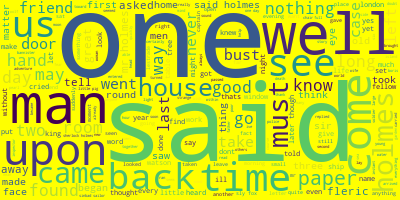

In [44]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(listOfFiles)

# Create a WordCloud object
wordcloud = WordCloud(background_color="yellow", max_words=1000, contour_width=6, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [46]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

C:\Users\niranjans3ln\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


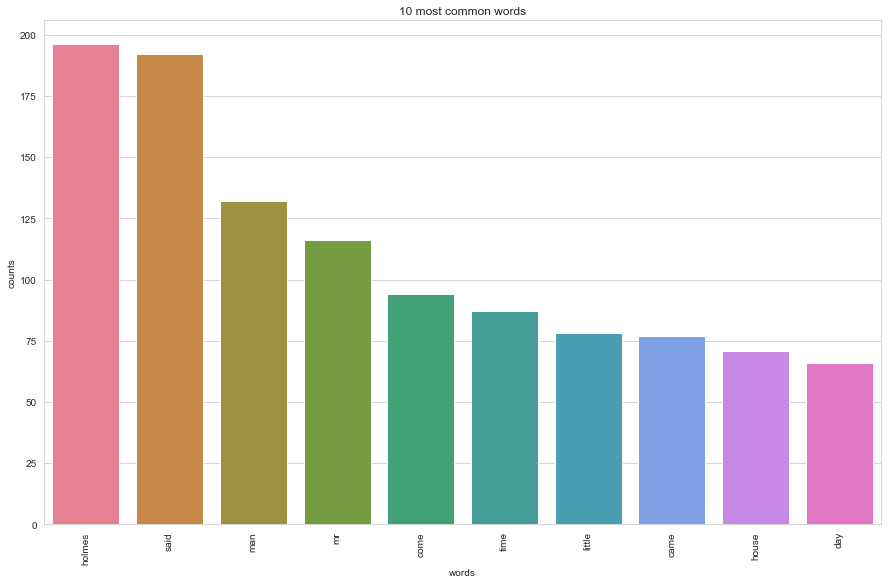

In [47]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(listOfFiles)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 11) List down the 10 words in each of the Topics Extracted. (2 Marks)

In [48]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
said holmes come man papers shall time openshaw think father

Topic #1:
man martin soldier king men asked away princess stream long

Topic #2:
holmes said mr man sir know come house door room

Topic #3:
sinbad day ship went said island came time captain later

Topic #4:
wife sausages woodcutter wish nose elf woodcutters wishes tree husband

Topic #5:
fleric boris moons thou armour flerics hand arch children body

Topic #6:
little wolf pig house pigs time come said brothers wisest

Topic #7:
rabbit fox sly little mrs mr rabs hedgehog old home

Topic #8:
soldier place wind way head hands like stay lived time

Topic #9:
old seven robbers samurai raiko said emperor mountain men bandits


# End Of Project.....